<a href="https://colab.research.google.com/github/kacperkurowski/CE888/blob/master/Assignment/Microsoft-Malware-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1

In [0]:
import os
import seaborn as sns

##1.Loading Data

In [2]:
os.environ['KAGGLE_USERNAME'] = "kacperkurowski" # username from the json file

os.environ['KAGGLE_KEY'] = "7c927dd985620db03df77b3804e71a95" # key from the json file

!kaggle competitions download -c microsoft-malware-prediction # api copied from kaggle

 95% 127M/134M [00:08<00:00, 17.4MB/s]
100% 134M/134M [00:08<00:00, 17.2MB/s]
100% 669M/672M [00:30<00:00, 30.2MB/s]
100% 672M/672M [00:30<00:00, 23.4MB/s]
100% 768M/768M [00:17<00:00, 52.1MB/s]
100% 768M/768M [00:17<00:00, 45.4MB/s]


##1.Renaming Files as data downloaded causes overwrite due to same file names

In [3]:
!rename 's/test.csv.zip/test1.csv.zip/' test.csv.zip
!rename 's/train.csv.zip/train1.csv.zip/' train.csv.zip
!ls

sample_data  sample_submission.csv.zip	test1.csv.zip  train1.csv.zip


##1.Removing Files that are not used

In [4]:
!rm sample_submission.csv.zip
!rm -r sample_data
!ls

test1.csv.zip  train1.csv.zip


##Loading the files

In [5]:
import pandas as pd

df_test1 = pd.read_csv("test1.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_test1)

df_train1 = pd.read_csv("train1.csv.zip", compression = 'zip', header = 0, sep = ',', quotechar = '"')

print(df_train1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                        MachineIdentifier  ... Wdft_RegionIdentifier
0        0000010489e3af074adeac69c53e555e  ...                   7.0
1        00000176ac758d54827acd545b6315a5  ...                  12.0
2        0000019dcefc128c2d4387c1273dae1d  ...                  11.0
3        0000055553dc51b1295785415f1a224d  ...                  10.0
4        00000574cefffeca83ec8adf9285b2bf  ...                   3.0
...                                   ...  ...                   ...
7853248  fffff8c0e065c468a2373f7afd5e7674  ...                  10.0
7853249  fffff90b27a1248b6fffc7a535bd736c  ...                  11.0
7853250  fffffa6a956c17ddbabca53d4ab708ae  ...                   7.0
7853251  fffffad7b6c8196ec5cae634406c0d4f  ...                  11.0
7853252  fffffbd305a90eb0f93ee4f30a39c736  ...                  10.0

[7853253 rows x 82 columns]
                        MachineIdentifier  ... HasDetections
0        0000028988387b115f69f31a3bf04f09  ...             0
1        000007535c3f

##Plotting Histogram of Microsoft-Malware-Prediction Train Data

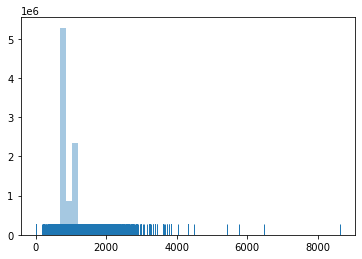

In [6]:
y_df = df_train1["Census_InternalPrimaryDisplayResolutionVertical"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Plotting Histogram of Microsoft-Malware-Prediction Test Data

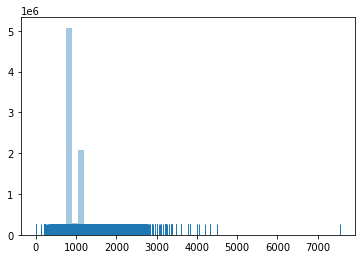

In [7]:
y_df = df_test1["Census_InternalPrimaryDisplayResolutionVertical"].copy()
y = y_df.values
sns_plot = sns.distplot(y, kde=False, rug=True)

##Adding Test Columns for testing Covariate Shift

In [8]:
df_train1['is_test'] = 0
df_test1['is_test'] = 1
print(df_train1.head())
print(df_test1.head())


                  MachineIdentifier   ProductName  ... HasDetections is_test
0  0000028988387b115f69f31a3bf04f09  win8defender  ...             0       0
1  000007535c3f730efa9ea0b7ef1bd645  win8defender  ...             0       0
2  000007905a28d863f6d0d597892cd692  win8defender  ...             0       0
3  00000b11598a75ea8ba1beea8459149f  win8defender  ...             1       0
4  000014a5f00daa18e76b81417eeb99fc  win8defender  ...             1       0

[5 rows x 84 columns]
                  MachineIdentifier  ... is_test
0  0000010489e3af074adeac69c53e555e  ...       1
1  00000176ac758d54827acd545b6315a5  ...       1
2  0000019dcefc128c2d4387c1273dae1d  ...       1
3  0000055553dc51b1295785415f1a224d  ...       1
4  00000574cefffeca83ec8adf9285b2bf  ...       1

[5 rows x 83 columns]


##Randomising Test and Train Data Sets

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

df = pd.concat([df_train1, df_test1], axis = 0)
X = df.drop(columns=['is_test'])
y = df['is_test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print('train1 shape:', X_train.shape, 'test1 shape:', X_test.shape)



##Let's use simple Random Forest as Classifier
#rfc = RandomForestClassifier()
#rfc.fit(X_train, y_train)
#y_test_score = rfc.predict_proba(X_test)



#import scikitplot as skplt
#import matplotlib.pyplot as plt

#skplt.metrics.plot_roc_curve(y_test, y_test_score)
#plt.show()


##AUC score is about 0.5
#print('AUC score: ', round(roc_auc_score(y_true=y_test, y_score=y_test_score[:,1]), 4))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [0]:
pip install scikit-plot

In [0]:
##Let's use simple Random Forest as Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_test_score = rfc.predict_proba(X_test)

import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, y_test_score)
plt.show()


##AUC score is about 0.5
print('AUC score: ', round(roc_auc_score(y_true=y_test, y_score=y_test_score[:,1]), 4))